In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

In [2]:
# sns.set_style('darkgrid')  # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)  # fontsize of the axes title
plt.rc('axes', labelsize=18)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # fontsize of the tick labels
plt.rc('legend', fontsize=18)  # legend fontsize
plt.rc('font', size=18)  # controls default text sizes
# plt.figure(figsize=(10, 8), tight_layout=True)

In [3]:
save_fig=True

In [4]:
def load_data_for_plot(data_path,max_n_exemplar=8):
    data=pickle.load(open(data_path,"rb"))
    data_mean=np.mean(data["y_mat"],axis=-1)[:max_n_exemplar,:max_n_exemplar]
    return data_mean

In [5]:
vg_noun_data=load_data_for_plot("../data/dumped_plot_data/2D_vg_noun_bert_visual_language_subsample_8_8_500.pkl")
vg_verb_data=load_data_for_plot("../data/dumped_plot_data/2D_vg_verb_bert_visual_language_subsample_8_8_500.pkl")

In [6]:
def draw_arrow(ax, x, y, dx, dy):
    ax.quiver(x,y,dx,dy,angles='xy',width=0.007)

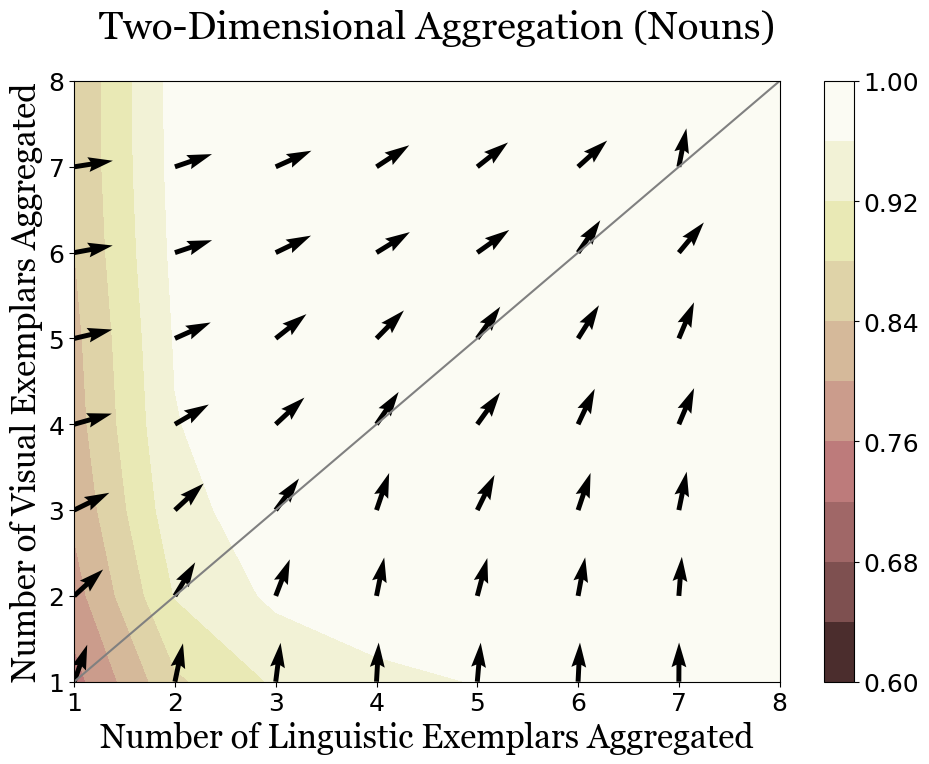

In [7]:
plt.figure(figsize=(10, 8), tight_layout=True)
color_range=np.linspace(0.6, 1.0, 11)
plt.contourf(range(vg_noun_data.shape[0]),range(vg_noun_data.shape[1]),vg_noun_data, color_range,cmap='pink')
plt.colorbar(boundaries=np.linspace(0,1,5))
plt.axline((0, 0), slope=1, color='grey')
for i in range(vg_noun_data.shape[0]-1):
    for j in range(vg_noun_data.shape[1]-1):
        d_x=vg_noun_data[i+1][j]-vg_noun_data[i][j]
        d_y=vg_noun_data[i][j+1]-vg_noun_data[i][j]
        draw_arrow(plt,i,j,d_x,d_y)
plt.xticks(range(0,8),range(1,9))
plt.yticks(range(0,8),range(1,9))
plt.xlabel("Number of Linguistic Exemplars Aggregated",fontsize=24,fontname="Georgia")
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=24,fontname="Georgia")

plt.text(0.25,7.5,'Two-Dimensional Aggregation (Nouns)',fontname='Georgia',fontsize=28)

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/2D_agg_vg_nouns.png",dpi=600)
plt.show()

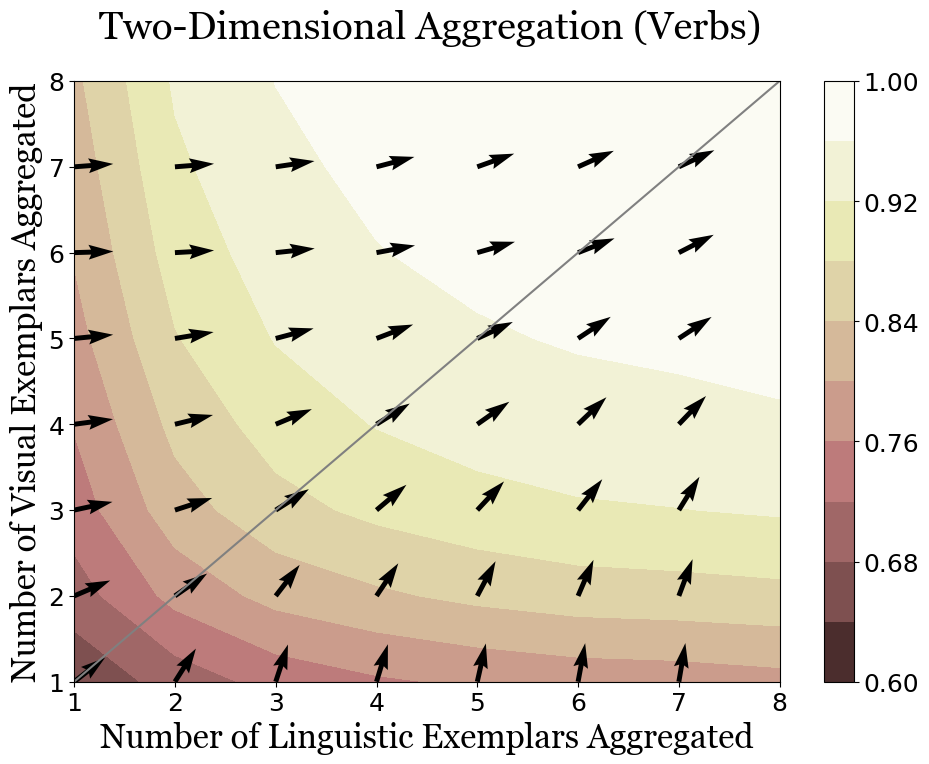

In [8]:
plt.figure(figsize=(10, 8), tight_layout=True)
color_range=np.linspace(0.6, 1.0, 11)
plt.contourf(range(vg_verb_data.shape[0]),range(vg_verb_data.shape[1]),vg_verb_data, color_range, cmap='pink')
plt.colorbar()
plt.axline((0, 0), slope=1, color='grey')
for i in range(vg_verb_data.shape[0]-1):
    for j in range(vg_verb_data.shape[1]-1):
        d_x=vg_verb_data[i+1][j]-vg_verb_data[i][j]
        d_y=vg_verb_data[i][j+1]-vg_verb_data[i][j]
        draw_arrow(plt,i,j,d_x,d_y)

plt.xticks(range(0,8),range(1,9))
plt.yticks(range(0,8),range(1,9))
plt.xlabel("Number of Linguistic Exemplars Aggregated",fontsize=24,fontname="Georgia")
plt.ylabel("Number of Visual Exemplars Aggregated",fontsize=24,fontname="Georgia")

plt.text(0.25,7.5,'Two-Dimensional Aggregation (Verbs)',fontname='Georgia',fontsize=28)

plt.tight_layout()
if save_fig:
    plt.savefig("../figs/2D_agg_vg_verbs.png",dpi=600)
plt.show()